In [2]:
import winsound
def beepEnd():
    d = 200
    freq = [3000,5000,3000,5000]
    for i in freq:
        winsound.Beep(i, d)

In [3]:
import warnings
import pandas as pd 
import numpy as np
import pickle 
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from itertools import combinations
from itertools import permutations


def acceptanceProbability (bestMSE, newMSE, temp , K):
        # If the new solution is worse, calculate an acceptance probability
        return np.exp( K * (newMSE - bestMSE) / temp)
    
def calcMSE(combDesc, x_train, x_val, y_train, y_val, model):
    x_train_slice = x_train.iloc[:,combDesc]
    x_val_slice = x_val.iloc[:,combDesc]
    model.fit(x_train_slice, y_train)
    y_pred = model.predict(x_val_slice)
    return mean_squared_error(y_val, y_pred)

warnings.filterwarnings('ignore')
unpick_dtTrain = pd.read_pickle("./dtTrain.pkl")
inDt = open("dtTrain.pkl","rb")
dtTrain = pickle.load(inDt)
# dtTrain.head()

In [3]:
descName = unpick_dtTrain.columns.to_list()

In [4]:
##### SIMULATED ANNEALING #####

# 0. Preparation Data
train, val = train_test_split(dtTrain, test_size = 0.2, random_state = 45)

x_train = train.iloc[:,:-1]
x_val = val.iloc[:,:-1]
y_train = train.iloc[:, [-1]]
y_val = val.iloc[:,[-1]]

model = LinearRegression()

In [ ]:
##### INTO DE SA DE LA'SOIN #####
descNum = 6
descMSE_20 = []

for j in tqdm(range(20)):
    # 3.1Initiate Values
    initTemp, temp = 100, 100
    tempEnd = 0.1
    cooling_rate = 0.98
    iteration = 5 

    # 3.1 Simulated Annealing
    bestList = []
    bestMSEList = []
    sounded = True

    # 3.2 Initialize solution & Best MSE (Random 6 descriptor)
    bestSol = np.random.choice(x_train.shape[1],descNum, replace=False)
    bestSol = list(bestSol)
    bestSol.sort()

    # 3.3 MSE
    bestMSE = calcMSE(bestSol, x_train, x_val, y_train, y_val, model)
    while temp > tempEnd:
        for i in range(iteration):

            # 3.3.1 Create new solution & new MSE
            newSol = np.random.choice(x_train.shape[1], descNum, replace=False)
            newMSE = calcMSE(newSol, x_train, x_val, y_train, y_val, model)
            deltaMSE = newMSE - bestMSE
            K = (initTemp * np.log(0.8)) / deltaMSE

            if newMSE < bestMSE :
                bestMSE = newMSE
                bestSol = newSol
                bestList.append([bestMSE,bestSol])
            else :
                if acceptanceProbability (bestMSE, newMSE, temp , K) > np.random.rand(0,1):
                    bestMSE = newMSE
                    bestSol = newSol
                    bestList.append([bestMSE,bestSol])

        temp *= cooling_rate
        bestMSEList.append(bestMSE)

    descMSE_20.append([bestList[-1][0],bestList[-1][1],bestMSEList])
beepEnd()

In [ ]:
pd.DataFrame(descMSE_20)

In [ ]:
dfBestDM = pd.DataFrame(descMSE_20)
dfBestDM.columns=["MSE","solution","growth"]
dfBestDM.sort_values('MSE', inplace=True)
dfBestDM.reset_index(drop=True, inplace= True)
dfBestDM

In [ ]:
bestDescriptor = []
for i in dfBestDM.iloc[0,1]:
    bestDescriptor.append(descName[i])

bestMSEGrowth = dfBestDM.iloc[0,2]

In [ ]:
# Pickle descriptor name
pickle.dump(dfBestDM, open('./data/MSE_EvolutionV2.pkl', 'wb'))
pickle.dump(bestDescriptor, open('./data/bestDescV2.pkl', 'wb'))
pickle.dump(bestMSEGrowth, open('./data/bestMSEGrowthV2.pkl','wb'))

In [4]:
MSE_Evol = pickle.load(open('./data/MSE_EvolutionV2.pkl', 'rb'))

Text(0, 0.5, 'MSE')

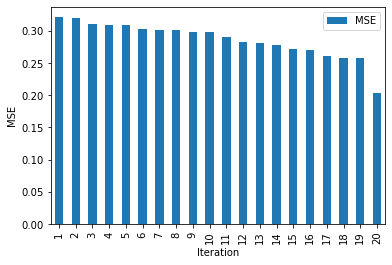

In [10]:
type(MSE_Evol)
# MSE_Evol
dfBestDM = MSE_Evol.sort_values('MSE', ascending=False)
df = dfBestDM.reset_index(drop=True)
df.index += 1
dfPlot = df.plot.bar()
dfPlot.set_xlabel("Iteration")
dfPlot.set_ylabel("MSE")

In [ ]:
############## CUSTOMIZED CODE ##################################

In [ ]:
# bestMSEList
dfBest.columns = ["mse","solution"]
dfBest.sort_values('mse', inplace=True)
dfBest.reset_index(drop=True, inplace= True)
dfBest

In [ ]:
bestSolution = dfBest.loc[0,'solution']
bestSolution = list(bestSolution)
bestSolution.sort()
bestSolution

In [ ]:
bestDescriptor = []

for i in bestSolution:
    bestDescriptor.append(descName[i])
bestDescriptor

In [ ]:
mseNdarray = np.asarray(bestMSEList)
type(mseNdarray)
mseNdarray.dump("./bestMSEList_2.pkl")
dfBest.iloc[-1][1].dump("./bestDesc_2.pkl")

In [ ]:
len(mseNdarray)
np.arange(0,len(mseNdarray),1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#define variable x
x = np.arange(0,len(mseNdarray),1)
y = mseNdarray 

#plot the functions
plt.grid()
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error (MSE)")

plt.plot(x,y)

In [ ]:
MSE_Evol = pickle.load(open('./data/MSE_EvolutionV2.pkl', 'rb'))
bestDesc = pickle.load(open('./data/bestDescV2.pkl', 'rb'))
bestMSEGrowth = pickle.load(open('./data/bestMSEGrowthV2.pkl', 'rb'))

In [ ]:
bestDesc, MSE_Evol, bestMSEGrowth

In [ ]:
bestMSEGrowth

In [ ]:
# First Best Run
# BestDescriptors=  [31,18,54,36,8,51]
# BestMSE =  0.24519892533514573

# Second Best Run
# Best Descriptors :  [53 61 18 69 36 34]
# Best MSE :  0.22850883728849938

# Best Descriptors :  [40 11  5 67 64 69]
# Best MSE :  0.22858482530945248

# Best Descriptors :  [38 51 55 58 36 18]
# Best MSE :  0.20720460921006825

In [ ]:
# ### Smallest Values before run 20s
# bs = [38, 51, 55, 58, 36, 18]
# bs.sort()
# bs

In [ ]:
# bds = []
# for i in bs:
#     bds.append(descName[i])
# bds

In [ ]:
# pickle.dump(bds,open('./BestDescriptor.pkl','wb'))